In [1]:
from pathlib import Path
import vaex
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd

import pandas as pd

from scipy import interpolate
import gaiaxpy as gxp 


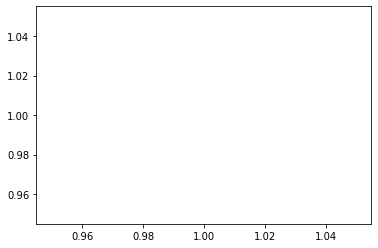

In [2]:
%matplotlib inline


plt.plot([1],[1])

font = {"weight": "normal", "size": 14}
plt.rcParams["axes.linewidth"] = 1.5  # set the value globally
plt.rc("font", **font)
plt.rcParams["axes.facecolor"] = "white"
plt.rcParams["figure.facecolor"] = "white"
_legend = {"frameon": True, "framealpha":0.7}
plt.rc("legend", **_legend)
plt.show()

In [3]:
tester = "/Users/users/spirov/PopProject/"


df = vaex.open(tester+"poege5_10kpc_ebvle0.2_Gle16_wJPLUSandJKC.hdf5")

In [4]:


#subFrame = subFrame.join(dataFrame,on="source_id",how="inner",rsuffix="o_")

df["Jkc_b_cleansed"] = df.Jkc_mag_B - 3.1*df.ebv*1.32616
df["Jkc_v_cleansed"] = df.Jkc_mag_V   - 3.1*df.ebv*0.99575



df["B-V"] = df.Jkc_b_cleansed-df.Jkc_v_cleansed


BV = df["B-V"]
mG = df.phot_g_mean_mag


dM = -5*np.log10(df.distance)
M = mG-5+dM
df["Mag"] =M

In [5]:
corrFlux = 10**(-51.1/2.5)
AfAv = 1.54
fi = 10**(df.ebv*AfAv*3.1/2.5)
Jpas_flux_u_corr = fi*df.Jpas_flux_u/corrFlux


AfAv = 1.44
fi = 10**(df.ebv*AfAv*3.1/2.5)
Jpas_flux_400_corr = fi*df.Jpas_flux_J0400/corrFlux

AfAv = 1.4
fi = 10**(df.ebv*AfAv*3.1/2.5)
Jpas_flux_410_corr = fi*df.Jpas_flux_J0410/corrFlux


JpasHigh = Jpas_flux_400_corr + Jpas_flux_u_corr+Jpas_flux_410_corr

#-------------------------
AfAv = 1.36
fi = 10**(df.ebv*AfAv*3.1/2.5)
Jpas_flux_420_corr = fi*df.Jpas_flux_J0420/corrFlux

AfAv = 1.4
fi = 10**(df.ebv*AfAv*3.1/2.5)
Jpas_flux_410_corr = fi*df.Jpas_flux_J0410/corrFlux

JpasMid = Jpas_flux_410_corr+Jpas_flux_420_corr

AfAv = 1.33
fi = 10**(df.ebv*AfAv*3.1/2.5)
Jpas_flux_430_corr = fi*df.Jpas_flux_J0430/corrFlux

#--------------------------

AfAv = 0.865
fi = 10**(df.ebv*AfAv*3.1/2.5)
Jpas_flux_SDDS_corr = fi*df.Jpas_flux_iSDSS/corrFlux

#--------------------------




In [6]:
AfAv = 1.54
fi = 10**(df.ebv*AfAv*3.1/2.5)
Jpas_flux_err_u_corr = fi*df.Jpas_flux_error_u/corrFlux


AfAv = 1.44
fi = 10**(df.ebv*AfAv*3.1/2.5)
Jpas_flux_err_400_corr = fi*df.Jpas_flux_error_J0400/corrFlux

AfAv = 1.4
fi = 10**(df.ebv*AfAv*3.1/2.5)
Jpas_flux_err_410_corr = fi*df.Jpas_flux_error_J0410/corrFlux



#-------------------------
AfAv = 1.36
fi = 10**(df.ebv*AfAv*3.1/2.5)
Jpas_flux_err_420_corr = fi*df.Jpas_flux_error_J0420/corrFlux

AfAv = 1.4
fi = 10**(df.ebv*AfAv*3.1/2.5)
Jpas_flux_err_410_corr = fi*df.Jpas_flux_error_J0410/corrFlux


AfAv = 1.33
fi = 10**(df.ebv*AfAv*3.1/2.5)
Jpas_flux_err_430_corr = fi*df.Jpas_flux_error_J0430/corrFlux

#--------------------------

AfAv = 0.865
fi = 10**(df.ebv*AfAv*3.1/2.5)
Jpas_flux_err_SDDS_corr = fi*df.Jpas_flux_error_iSDSS/corrFlux

#-------------------------


In [7]:
df["JfSSDS"] = Jpas_flux_SDDS_corr
df["Jf430"] = Jpas_flux_430_corr
df["Jf410"] = Jpas_flux_410_corr
df["Jf400"] = Jpas_flux_400_corr
df["Jfu"] = Jpas_flux_u_corr


df["JfeSSDS"] = Jpas_flux_err_SDDS_corr
df["Jfe430"] = Jpas_flux_err_430_corr
df["Jfe410"] = Jpas_flux_err_410_corr
df["Jfe400"] = Jpas_flux_err_400_corr
df["Jfeu"] = Jpas_flux_err_u_corr

In [8]:
def mag(f):
    return -2.5*np.log10(f)

df["JpasHigh"] = mag(JpasHigh)
df["JpasMid"] = mag(JpasMid)
df["Jpas420"] = mag(Jpas_flux_420_corr)
df["Jpas430"] = mag(Jpas_flux_430_corr)
df["JpasSDSS"] = mag(Jpas_flux_SDDS_corr)


In [9]:
name = "Jpas (H-430)-(430-JpasSDSS)"

mag = df.JpasHigh-df.Jpas430
MPivot = df.Jpas430-df.JpasSDSS
myCol = mag-MPivot

df["CustomCol"] = myCol

color =  df.CustomCol.values


In [10]:
magErrHigh = np.sqrt(df.Jfeu**2+df.Jfe400**2+df.Jfe400**2)*(2.5/np.log(10))/(df.Jfu + df.Jf400 + df.Jf410)
magErr430 = df.Jfe430*(2.5/np.log(10))/(df.Jf430)
magErrSSDS = df.JfeSSDS*(2.5/np.log(10))/(df.JfSSDS)

Efirst = np.sqrt(magErrHigh**2+magErr430**2)
Esecond = np.sqrt(magErr430**2+magErrSSDS**2)

fErr = np.sqrt(Efirst**2+Esecond**2)



df["error_color_mag"] = fErr

0


AttributeError: 'DataFrameLocal' object has no attribute 'xgboost'

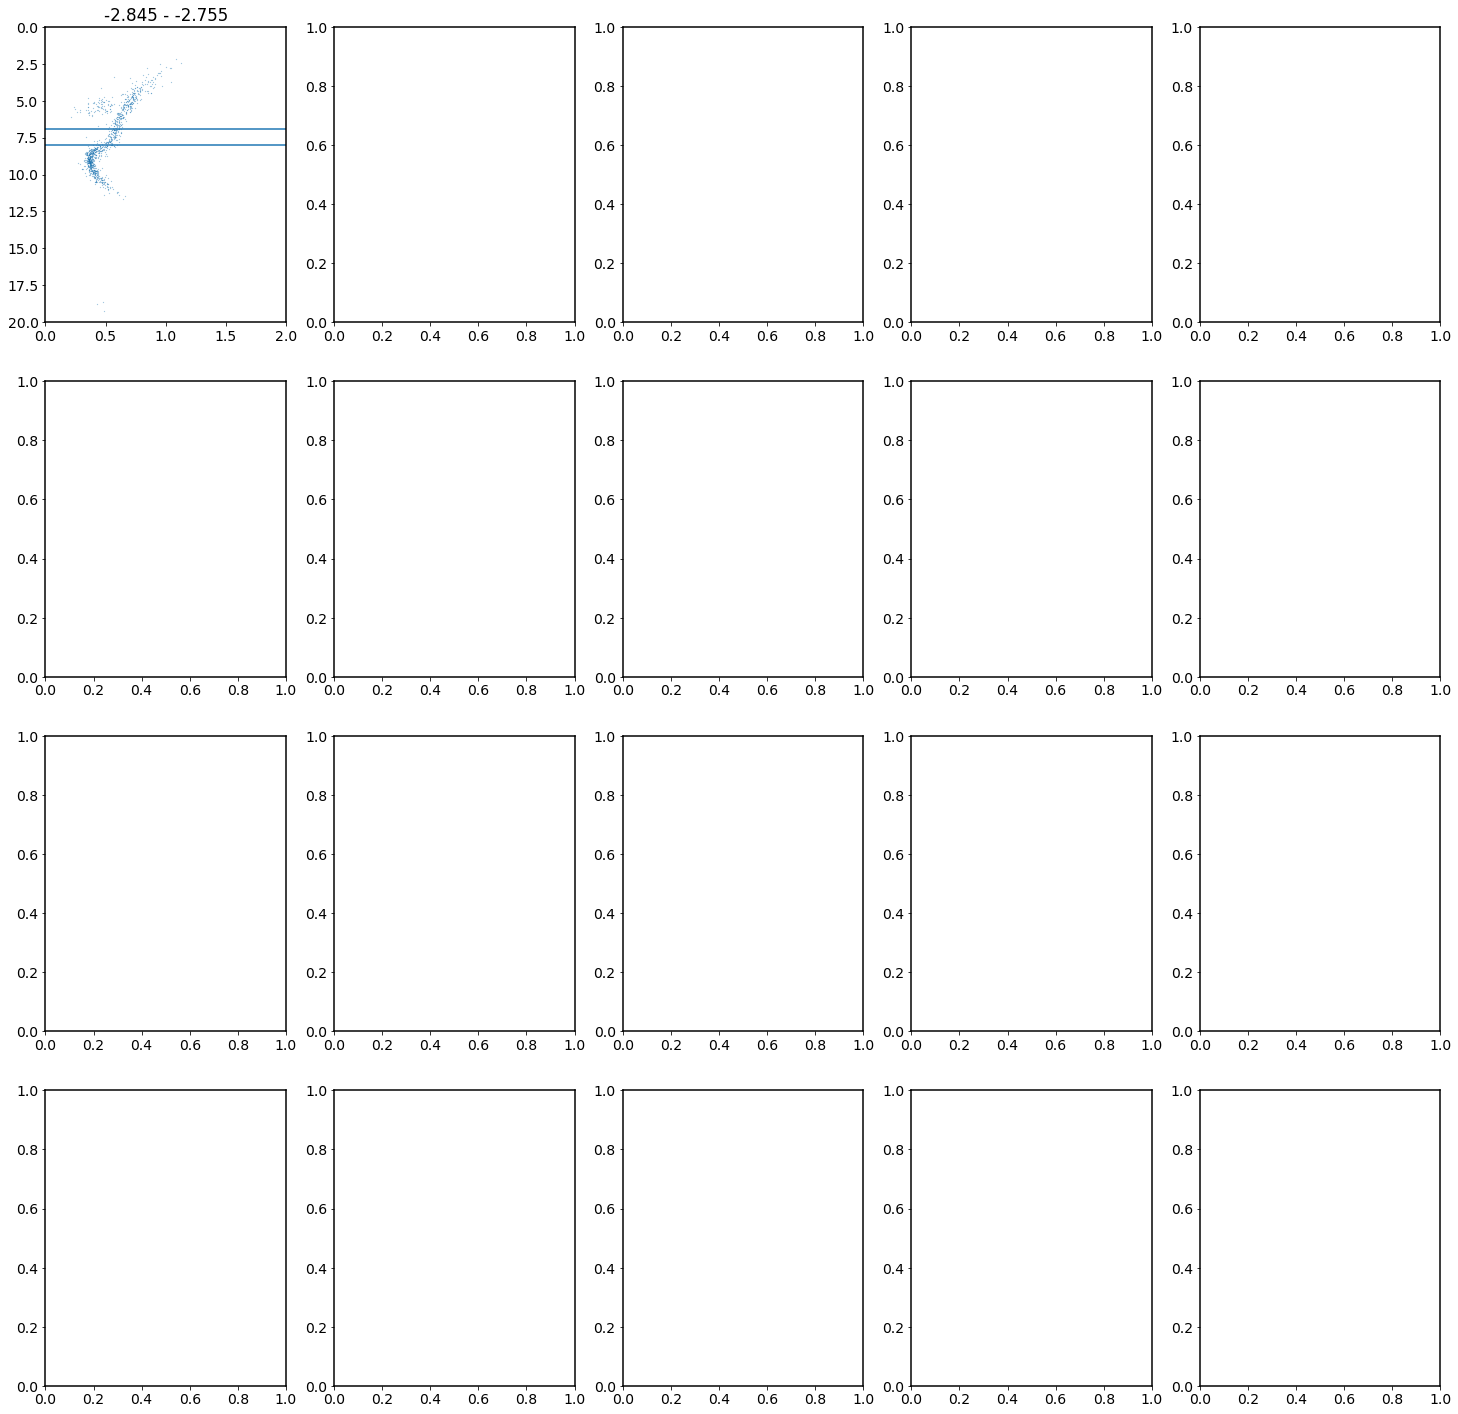

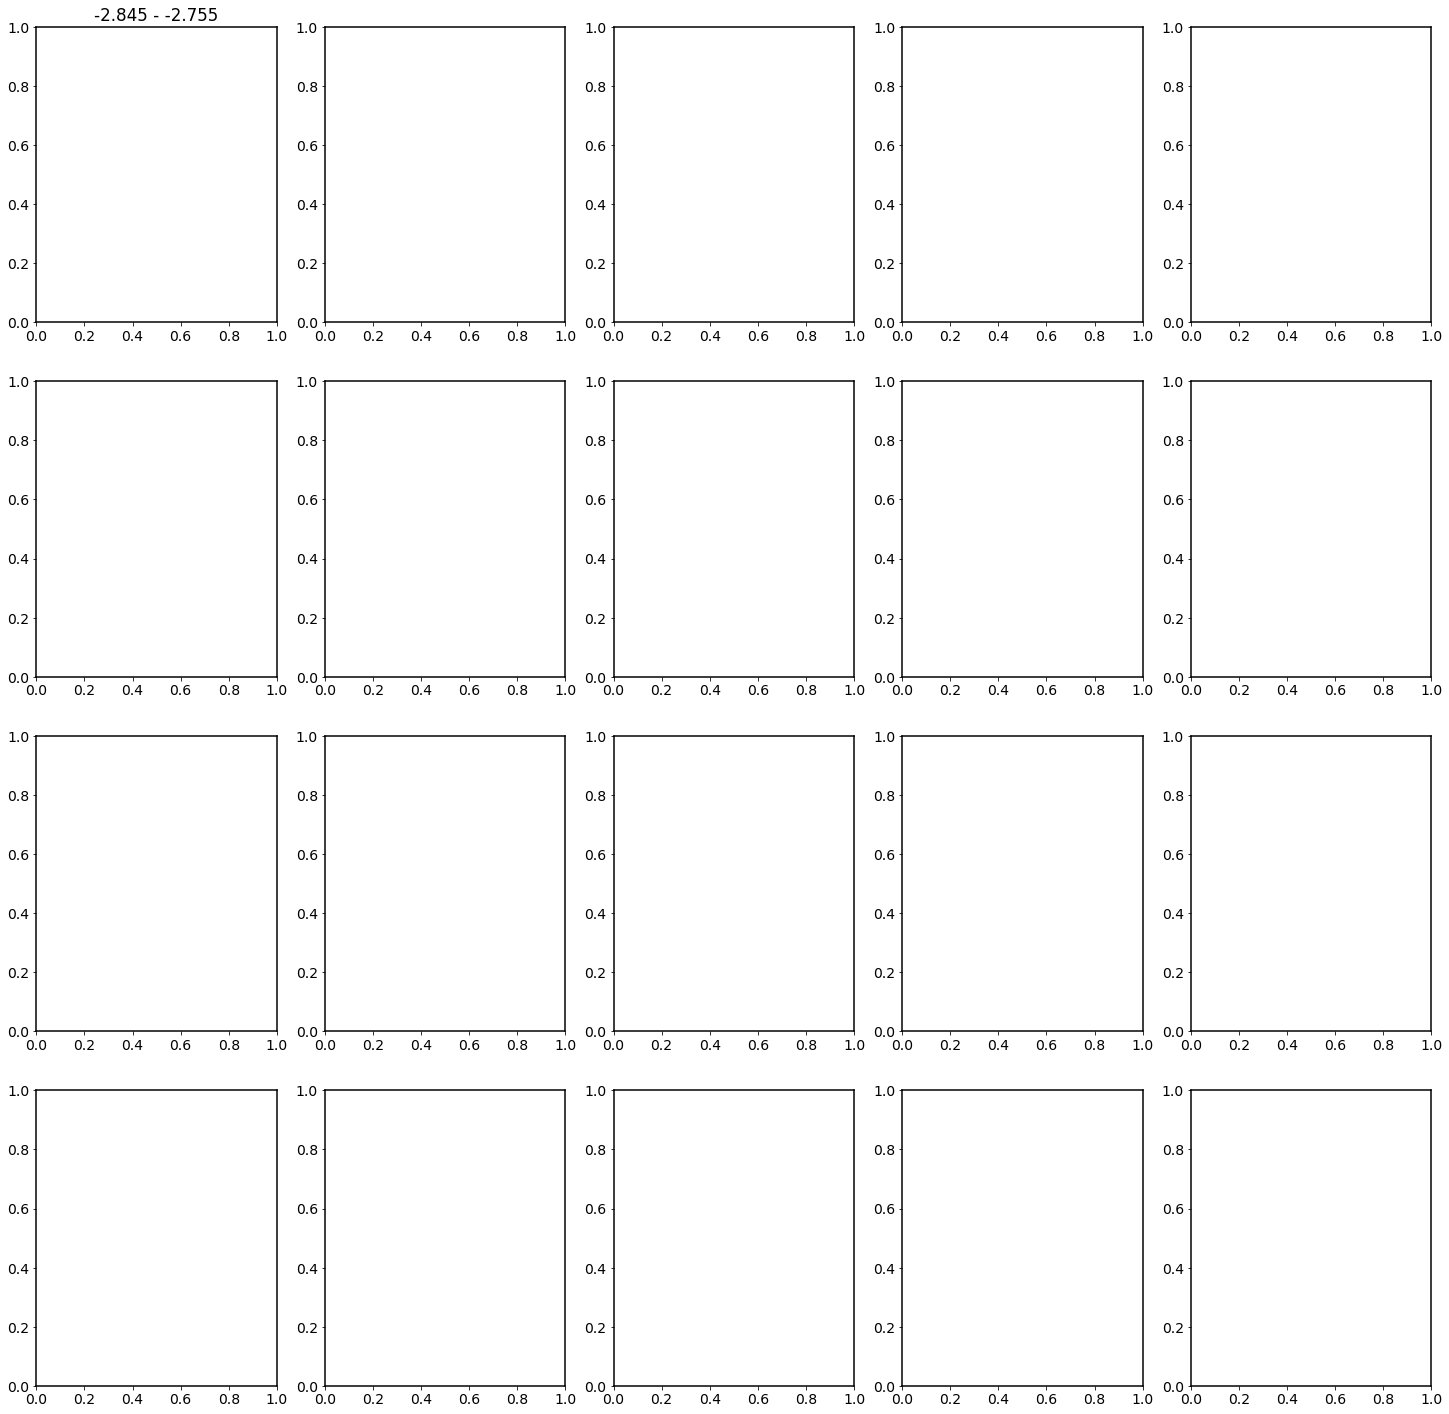

In [12]:
#zRange = 0.1
zPoint = -1.54

t = -1
b = -2.8
n=20

zPoints = np.linspace(b,t,n)
zRange = (t-b)/n



fig, ax = plt.subplots(4,5)
fig2,ax2 = plt.subplots(4,5)

fig.set_size_inches(25,25)
fig2.set_size_inches(25,25)

ax = ax.flatten()
ax2 = ax2.flatten()


Tlim = 5.5e3




for i, zPoint in  enumerate(zPoints):
    print(i)

    bot = np.round(zPoint-0.5*zRange,3)
    top = np.round(zPoint+0.5*zRange,3)
    

    ax[i].set_title(f"{bot} - {top}")
    ax2[i].set_title(f"{bot} - {top}")
    cut = (df.mh_xgboost>bot)*(df.mh_xgboost<top)
    subFrame = df[cut]
    
    Ms = subFrame.Mag.values

    color = subFrame.CustomCol.values
    
    BV =subFrame["B-V"].values
    
    ax[i].scatter(BV,Ms,marker=".",s=0.1)
    ax[i].set_xlim(0,2)
    ax[i].set_ylim(20,0)
    #subFrame.viz.heatmap("CustomCol","Mag",title="CMD",limits=((-5,0),(30,10)))
    
    
    top = 6.9
    bot = 8
    
    ax[i].axhline(top)
    ax[i].axhline(bot)
    
    rgbFrame = subFrame[(subFrame.Mag<bot)*subFrame.Mag>top]
    
    tcut = rgbFrame.teff_xgboost<Tlim
    rgbFrame = rgbFrame[tcut]
    
    
    
    ax2[i].scatter(rgbFrame["B-V"].values,rgbFrame.Mag.values,marker=".",s=0.1,c=rgbFrame.xgboost+teff.values)
    ax2[i].set_xlim(0,2)
    ax2[i].set_ylim(bot,top)
    top = 6.9
    bot = 8
    
    
    

  #  print(i)
plt.show() 

In [ ]:
def log_likelihood(E, x, var):
    return -0.5*np.sum(np.log(2*np.pi*(E**2+var**2)) + ((x)**2)/(E**2+var**2))

def E_log_likelihood(E):
    return log_likelihood(E, N, N_error)

def first(E, x, var):
    return np.sum(((E*((x)**2))/((E**2+var**2))) - E/(E**2+var**2))

def newton_raphson(E_init, x, var, max_iter=10000, tol=1e-10):
    E_values = [E_init]
    
    for i in range(max_iter):
        E_current = E_values[-1]
        
        ## Compute update step using Newton-Raphson
        update_step = log_likelihood(E_current, x, var)/first(E_current, x, var)
        
        ## Update parameter value
        E_new = E_current - update_step
        E_values.append(E_new)
        
        ## Check for convergence
        if np.abs(update_step) < tol:
            break
    
    return np.array(E_values)
def log_2likelihood(params, x, var):
    MU_arr, E_arr = params
    llh = np.zeros((len(MU_arr), len(E_arr)))
    for i in range(len(MU_arr)):
        for j in range(len(E_arr)):
            llh[i,j] = -0.5*np.sum(np.log(2*np.pi*(E_arr[j]**2+var**2)) + ((x-MU_arr[i])**2)/(E_arr[j]**2+var**2))
    return llh

In [ ]:

zPoints = np.linspace(b,t,n)
zRange = (t-b)/n


#plt.figure(figsize=(10,8))
#plt.ylabel('Likelihoods', fontsize=14)

Ems=[]
Mums=[]
xs = []
llhs = []

stds=[]

func = lambda x: -1*log_likelihood(x, N, N_error)

for i, zPoint in  enumerate(zPoints[:]):
    print(i)

    bot = np.round(zPoint-0.5*zRange,3)
    top = np.round(zPoint+0.5*zRange,3)
    
    cut = (df.mh_xgboost>bot)*(df.mh_xgboost<top)
    subFrame = df[cut]
        
    top = 6.9
    bot = 8
    
    rgbFrame = subFrame[(subFrame.Mag<bot)]#*subFrame.Mag>top]
    
    tcut = rgbFrame.teff_xgboost<Tlim
    rgbFrame = rgbFrame[tcut]
    
    
        
    col = rgbFrame.CustomCol.values
    
    point = bot-0.5
    


    nG = rgbFrame.Mag.values

    bins = np.linspace(4, bot+0.1, 15)

    bc =[]
    mu=[]
    sig=[]
    isig=[]

    for xmin, xmax in zip(bins[:-1], bins[1:]):
        cen = (xmax + xmin)/2
        j = (nG < xmax)*(nG >= xmin)

        if len(np.where(j==True)[0]) ==0:
            print("skip")
            continue

        cs = col[j]
        cs = cs[~np.isnan(cs)]
        mc = np.median(cs)
        std = np.std(cs)
        bc.append(cen)
        mu.append(mc)
        sig.append(std)

    p = np.polyfit(bc,mu, 6)
    f = lambda x: np.polyval(p,x)

    X = np.linspace(top,point)


    clensedCol = col[~np.isnan(col)]
    cleansedMG = nG[~np.isnan(col)]

    zone = np.logical_and(cleansedMG<bot, cleansedMG>top)

 #   subFrame.viz.scatter("CustomCol","Mag",s=1)
 #   plt.plot(f(X),X,c='r')
 #   plt.ylim(10,6)
 #   plt.show()
    
    
    MG = cleansedMG
    NC = clensedCol - f(MG)

    MG = MG[zone]

    N=NC[zone]

    N_error = rgbFrame.error_color_mag.values[~np.isnan(col)][zone]
    
    E_arr = np.linspace(0, 0.2, 200)
    log_arr = []

    for E in E_arr:
        log_arr.append(log_likelihood(E, N, N_error))
    
    
    trueLikelyhood= np.exp(np.array(log_arr[n:])-max(log_arr))
   # plt.plot(E_arr[n:],trueLikelyhood , lw=2,marker="+")
    
    
    MU_arr = np.linspace(-0.1, 0.1, 200)
    parameters = [MU_arr, E_arr]

    llh = log_2likelihood(parameters, N, N_error)
    llhs.append(llh)
    
    index_max_llh = np.argwhere(llh == np.max(llh))[0]
    max_E = E_arr[index_max_llh[1]]
    max_MU = MU_arr[index_max_llh[0]]

    Ems.append(max_E)
    Mums.append(max_MU)
    
   # res = minimize(func, 0.01, method='SLSQP', tol=1e-10)
    lklhd = np.exp(llh[index_max_llh[0]] -np.max(llh[index_max_llh[0]]))
    
    tol = 0.01
    while len(E_arr[np.where(abs(lklhd-0.5)<tol)]) <2:
        #tol+=0.03
        tol*=2
    fwhm = np.max(np.diff(E_arr[np.where(abs(lklhd-0.5)<tol)]))
    std = fwhm/(2*np.sqrt(2*np.log(2)))
    stds.append(std)

   # xs.append(res.x[0])
    
#plt.show() 

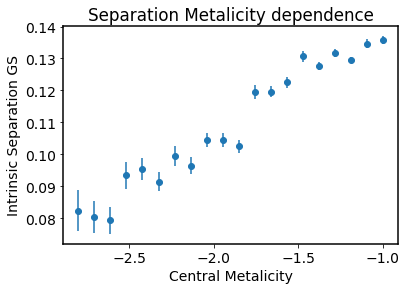

In [21]:


plt.scatter(zPoints,Ems)
plt.errorbar(zPoints,Ems,stds,ls="")
plt.title("Separation Metalicity dependence")
plt.xlabel("Central Metalicity")
plt.ylabel("Intrinsic Separation GS")
plt.show()



In [15]:


#plt.figure(figsize=(10,8))
#plt.ylabel('Likelihoods', fontsize=14)

BVEms=[]
BVstds=[]

func = lambda x: -1*log_likelihood(x, N, N_error)

for i, zPoint in  enumerate(zPoints[:]):
    print(i)

    bot = np.round(zPoint-0.5*zRange,3)
    top = np.round(zPoint+0.5*zRange,3)
    
    cut = (df.mh_xgboost>bot)*(df.mh_xgboost<top)
    subFrame = df[cut]
        
    top = 6.9
    bot = 8
    
    rgbFrame = subFrame[(subFrame.Mag<bot)*subFrame.Mag>top]
    
    tcut = rgbFrame.teff_xgboost<Tlim
    rgbFrame = rgbFrame[tcut]
    
    
        
    col = rgbFrame["B-V"].values
    
    point = bot
    p2 =top

    botm = top
    
    nG = rgbFrame.Mag.values

    bins = np.linspace(botm, point+0.1, 15)

    bc =[]
    mu=[]
    sig=[]
    isig=[]

    for xmin, xmax in zip(bins[:-1], bins[1:]):
        cen = (xmax + xmin)/2
        j = (nG < xmax)*(nG >= xmin)

        if len(np.where(j==True)[0]) ==0:
            print("skip")
            continue

        cs = col[j]
        cs = cs[~np.isnan(cs)]
        mc = np.median(cs)
        std = np.std(cs)
        bc.append(cen)
        mu.append(mc)
        sig.append(std)

    p = np.polyfit(bc,mu, 3)
    f = lambda x: np.polyval(p,x)




    clensedCol = col[~np.isnan(col)]
    cleansedMG = nG[~np.isnan(col)]

    zone = np.logical_and(cleansedMG<point, cleansedMG>p2)

    MG = cleansedMG
    NC = clensedCol - f(MG)



    N=NC[zone]

    N_error = rgbFrame.error_color_mag.values[~np.isnan(col)]
    
    E_arr = np.linspace(0, 0.2, 200)
    log_arr = []

    for E in E_arr:
        log_arr.append(log_likelihood(E, N, N_error))
    
    
    trueLikelyhood= np.exp(np.array(log_arr[n:])-max(log_arr))
   # plt.plot(E_arr[n:],trueLikelyhood , lw=2,marker="+")
    
    
    MU_arr = np.linspace(-0.1, 0.1, 200)
    parameters = [MU_arr, E_arr]

    llh = log_2likelihood(parameters, N, N_error)
    
    index_max_llh = np.argwhere(llh == np.max(llh))[0]
    max_E = E_arr[index_max_llh[1]]
    max_MU = MU_arr[index_max_llh[0]]

    BVEms.append(max_E)
    
    res = minimize(func, 0.01, method='SLSQP', tol=1e-10)
    lklhd = np.exp(llh[index_max_llh[0]] -np.max(llh[index_max_llh[0]]))
    
    tol = 0.01
    while len(E_arr[np.where(abs(lklhd-0.5)<tol)]) <2:
        #tol+=0.03
        tol*=2
    fwhm = np.max(np.diff(E_arr[np.where(abs(lklhd-0.5)<tol)]))
    std = fwhm/(2*np.sqrt(2*np.log(2)))
    BVstds.append(std)

#plt.show() 

0
skip
1
skip
2
skip
3
skip
4
skip
5
skip
6
skip
7
skip
8
skip
9
skip
10
skip
11
skip
12
skip
13
skip
14
skip
15
skip
16
skip
17
skip
18
skip
19
skip


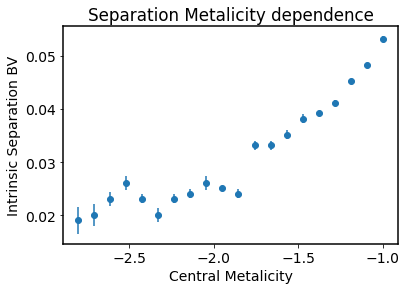

In [17]:

plt.scatter(zPoints,BVEms)
plt.errorbar(zPoints,BVEms,BVstds,ls="")
plt.title("Separation Metalicity dependence")
plt.xlabel("Central Metalicity")
plt.ylabel("Intrinsic Separation BV")
plt.show()



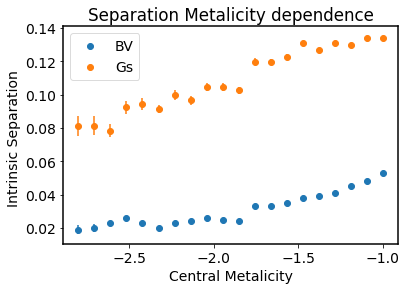

In [22]:

plt.scatter(zPoints,BVEms,label="BV")
plt.errorbar(zPoints,BVEms,BVstds,ls="")
plt.title("Separation Metalicity dependence")
plt.xlabel("Central Metalicity")
plt.ylabel("Intrinsic Separation ")



plt.scatter(zPoints,Ems,label="Gs")
plt.errorbar(zPoints,Ems,stds,ls="")
plt.legend()
plt.show()



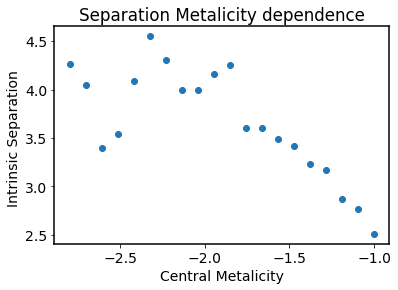

In [23]:

Ems = np.array(Ems)
BVEms=np.array(BVEms)

plt.scatter(zPoints,Ems/BVEms)
plt.title("Separation Metalicity dependence")
plt.xlabel("Central Metalicity")
plt.ylabel("Intrinsic Separation ")

plt.show()


In [24]:


gdir = "/net/gaia2/data/users/gaia/gaia-dr3/"

GF = vaex.open( gdir+ "gaia-dr3.hdf5")



In [25]:
minPar = 1/1.2e4

In [26]:
gf = GF[GF.parallax > minPar]

In [27]:
sid = gf["source_id"].values
br = gf["bp_rp"].values

In [28]:
sf = vaex.from_arrays(source_id=sid,bprp=br)

In [29]:
sf

#,source_id,bprp
0,4295806720,1.0190029
1,34361129088,2.4582462
2,38655544960,1.2922335
3,309238066432,2.3467846
4,343597448960,1.2704048
...,...,...
"1,110,254,070",6917528963217645568,2.0775757
"1,110,254,071",6917528993281571840,1.8323746
"1,110,254,072",6917528993281819008,0.9289055
"1,110,254,073",6917528993283204480,1.3404217


In [30]:
nf = df.join(sf,how="inner",on="source_id")

In [31]:
nf

#,source_id,ra,dec,parallax,parallax_error,pmra,pmra_error,pmdec,pmdec_error,parallax_pmra_corr,parallax_pmdec_corr,pmra_pmdec_corr,astrometric_excess_noise,astrometric_excess_noise_sig,astrometric_params_solved,astrometric_matched_transits,visibility_periods_used,ruwe,phot_g_n_obs,phot_g_mean_flux,phot_g_mean_flux_error,phot_g_mean_mag,phot_bp_n_obs,phot_bp_mean_flux,phot_bp_mean_flux_error,phot_bp_mean_mag,phot_rp_n_obs,phot_rp_mean_flux,phot_rp_mean_flux_error,phot_rp_mean_mag,radial_velocity,radial_velocity_error,rv_template_teff,rv_template_logg,rv_template_fe_h,rv_atm_param_origin,l,b,non_single_star,parallax_corr,parallax_corr_error,Gaia2_mag_C1B431,Gaia2_mag_C1B556,Gaia2_mag_C1B655,Gaia2_mag_C1B768,Gaia2_mag_C1B916,Gaia2_mag_C1M326,Gaia2_mag_C1M344,Gaia2_mag_C1M379,Gaia2_mag_C1M395,Gaia2_mag_C1M410,Gaia2_mag_C1M467,Gaia2_mag_C1M506,Gaia2_mag_C1M515,Gaia2_mag_C1M549,Gaia2_mag_C1M656,Gaia2_mag_C1M716,Gaia2_mag_C1M747,Gaia2_mag_C1M825,Gaia2_mag_C1M861,Gaia2_mag_C1M965,Gaia2_flux_C1B431,Gaia2_flux_C1B556,Gaia2_flux_C1B655,Gaia2_flux_C1B768,Gaia2_flux_C1B916,Gaia2_flux_C1M326,Gaia2_flux_C1M344,Gaia2_flux_C1M379,Gaia2_flux_C1M395,Gaia2_flux_C1M410,Gaia2_flux_C1M467,Gaia2_flux_C1M506,Gaia2_flux_C1M515,Gaia2_flux_C1M549,Gaia2_flux_C1M656,Gaia2_flux_C1M716,Gaia2_flux_C1M747,Gaia2_flux_C1M825,Gaia2_flux_C1M861,Gaia2_flux_C1M965,Gaia2_flux_error_C1B431,Gaia2_flux_error_C1B556,Gaia2_flux_error_C1B655,Gaia2_flux_error_C1B768,Gaia2_flux_error_C1B916,Gaia2_flux_error_C1M326,Gaia2_flux_error_C1M344,Gaia2_flux_error_C1M379,Gaia2_flux_error_C1M395,Gaia2_flux_error_C1M410,Gaia2_flux_error_C1M467,Gaia2_flux_error_C1M506,Gaia2_flux_error_C1M515,Gaia2_flux_error_C1M549,Gaia2_flux_error_C1M656,Gaia2_flux_error_C1M716,Gaia2_flux_error_C1M747,Gaia2_flux_error_C1M825,Gaia2_flux_error_C1M861,...,Jpas_flux_J0810,Jpas_flux_J0820,Jpas_flux_J0830,Jpas_flux_J0840,Jpas_flux_J0850,Jpas_flux_J0860,Jpas_flux_J0870,Jpas_flux_J0880,Jpas_flux_J0890,Jpas_flux_J0900,Jpas_flux_J0910,Jpas_flux_J1007,Jpas_flux_error_uJava,Jpas_flux_error_u,Jpas_flux_error_J0378,Jpas_flux_error_J0390,Jpas_flux_error_J0400,Jpas_flux_error_J0410,Jpas_flux_error_J0420,Jpas_flux_error_J0430,Jpas_flux_error_J0440,Jpas_flux_error_J0450,Jpas_flux_error_J0460,Jpas_flux_error_J0470,Jpas_flux_error_J0480,Jpas_flux_error_gSDSS,Jpas_flux_error_J0490,Jpas_flux_error_J0500,Jpas_flux_error_J0510,Jpas_flux_error_J0520,Jpas_flux_error_J0530,Jpas_flux_error_J0540,Jpas_flux_error_J0550,Jpas_flux_error_J0560,Jpas_flux_error_J0570,Jpas_flux_error_J0580,Jpas_flux_error_J0590,Jpas_flux_error_J0600,Jpas_flux_error_J0610,Jpas_flux_error_J0620,Jpas_flux_error_rSDSS,Jpas_flux_error_J0630,Jpas_flux_error_J0640,Jpas_flux_error_J0650,Jpas_flux_error_J0660,Jpas_flux_error_J0670,Jpas_flux_error_J0680,Jpas_flux_error_J0690,Jpas_flux_error_J0700,Jpas_flux_error_J0710,Jpas_flux_error_J0720,Jpas_flux_error_J0730,Jpas_flux_error_J0740,Jpas_flux_error_J0750,Jpas_flux_error_J0760,Jpas_flux_error_iSDSS,Jpas_flux_error_J0770,Jpas_flux_error_J0780,Jpas_flux_error_J0790,Jpas_flux_error_J0800,Jpas_flux_error_J0810,Jpas_flux_error_J0820,Jpas_flux_error_J0830,Jpas_flux_error_J0840,Jpas_flux_error_J0850,Jpas_flux_error_J0860,Jpas_flux_error_J0870,Jpas_flux_error_J0880,Jpas_flux_error_J0890,Jpas_flux_error_J0900,Jpas_flux_error_J0910,Jpas_flux_error_J1007,distance,in_training_sample,mh_xgboost,teff_xgboost,logg_xgboost,ebv,Jkc_b_cleansed,Jkc_v_cleansed,B-V,Mag,JfSSDS,Jf430,Jf410,Jf400,Jfu,JfeSSDS,Jfe430,Jfe410,Jfe400,Jfeu,JpasHigh,JpasMid,Jpas420,Jpas430,JpasSDSS,CustomCol,error_color_mag,bprp
0,38655544960,45.00497837174552,0.0198796757018586,3.1391701154499523,0.022347411,29.686339048921702,0.023771733,19.115199913956804,0.023830384,0.18184616,0.26367012,0.35528076,0.0,0.0,31,21,15,1.012191,180,42030.60043942405,11.392837,14.128453,20,17955.47937733753,26.03932,14.70305,19,34263.48754002838,36.75135,13.410816,41.187176,3.0473394226942965,4500.0,3.0,-0.25,111.0,176.94476211452783,-48.88527012426483,0,3.1821891154499524,0.0269

In [34]:


bprpEms=[]
bprpstds=[]

func = lambda x: -1*log_likelihood(x, N, N_error)

for i, zPoint in  enumerate(zPoints[:]):
    print(i)

    bot = np.round(zPoint-0.5*zRange,3)
    top = np.round(zPoint+0.5*zRange,3)
    
    cut = (nf.mh_xgboost>bot)*(nf.mh_xgboost<top)
    subFrame = nf[cut]
        
    top = 6.9
    bot = 8
    
    rgbFrame = subFrame[(subFrame.Mag<bot)*subFrame.Mag>top]
    
    tcut = rgbFrame.teff_xgboost<Tlim
    rgbFrame = rgbFrame[tcut]
    
    
        
    col = rgbFrame["bprp"].values
    
#    print("rgb")
    
    point = bot
    p2 =top

    botm = top
    
    nG = rgbFrame.Mag.values

    bins = np.linspace(botm, point+0.1, 15)

    bc =[]
    mu=[]
    sig=[]
    isig=[]

    for xmin, xmax in zip(bins[:-1], bins[1:]):
        cen = (xmax + xmin)/2
        j = (nG < xmax)*(nG >= xmin)

        if len(np.where(j==True)[0]) ==0:
            print("skip")
            continue

        cs = col[j]
        cs = cs[~np.isnan(cs)]
        mc = np.median(cs)
        std = np.std(cs)
        bc.append(cen)
        mu.append(mc)
        sig.append(std)

    p = np.polyfit(bc,mu, 3)
    f = lambda x: np.polyval(p,x)




    clensedCol = col[~np.isnan(col)]
    cleansedMG = nG[~np.isnan(col)]

    zone = np.logical_and(cleansedMG<point, cleansedMG>p2)

    MG = cleansedMG
    NC = clensedCol - f(MG)



    N=NC[zone]

    N_error = rgbFrame.error_color_mag.values[~np.isnan(col)]
    
    E_arr = np.linspace(0, 0.2, 200)
    log_arr = []

    for E in E_arr:
        log_arr.append(log_likelihood(E, N, N_error))
    
    
    trueLikelyhood= np.exp(np.array(log_arr[n:])-max(log_arr))
   # plt.plot(E_arr[n:],trueLikelyhood , lw=2,marker="+")
    
    
    MU_arr = np.linspace(-0.1, 0.1, 200)
    parameters = [MU_arr, E_arr]

    llh = log_2likelihood(parameters, N, N_error)
    
    index_max_llh = np.argwhere(llh == np.max(llh))[0]
    max_E = E_arr[index_max_llh[1]]
    max_MU = MU_arr[index_max_llh[0]]

    bprpEms.append(max_E)
    
    res = minimize(func, 0.01, method='SLSQP', tol=1e-10)
    lklhd = np.exp(llh[index_max_llh[0]] -np.max(llh[index_max_llh[0]]))
    
    tol = 0.01
    while len(E_arr[np.where(abs(lklhd-0.5)<tol)]) <2:
        #tol+=0.03
        tol*=2
    fwhm = np.max(np.diff(E_arr[np.where(abs(lklhd-0.5)<tol)]))
    std = fwhm/(2*np.sqrt(2*np.log(2)))
    bprpstds.append(std)

#plt.show() 

0
skip
1
skip
2
skip
3
skip
4
skip
5
skip
6
skip
7
skip
8
10
skip
11
skip
12
skip
13
skip
14
skip
15
skip
16
skip
17
skip
18
skip
19
skip


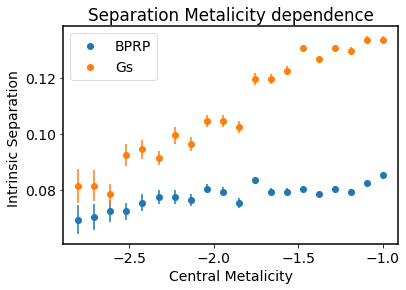

In [35]:

plt.scatter(zPoints,bprpEms,label="BPRP")
plt.errorbar(zPoints,bprpEms,bprpstds,ls="")
plt.title("Separation Metalicity dependence")
plt.xlabel("Central Metalicity")
plt.ylabel("Intrinsic Separation ")



plt.scatter(zPoints,Ems,label="Gs")
plt.errorbar(zPoints,Ems,stds,ls="")
plt.legend()
plt.show()



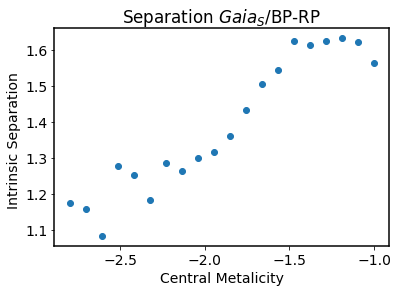

In [38]:

Ems = np.array(Ems)
bprpEms=np.array(bprpEms)

plt.scatter(zPoints,Ems/bprpEms)
plt.title(r"Separation $Gaia_S$/BP-RP")
plt.xlabel("Central Metalicity")
plt.ylabel("Intrinsic Separation ")

plt.show()


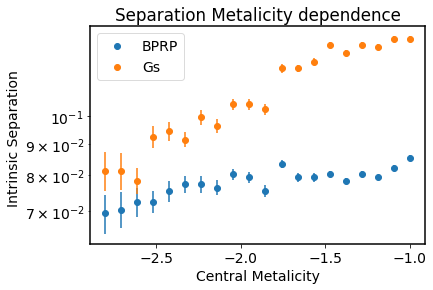

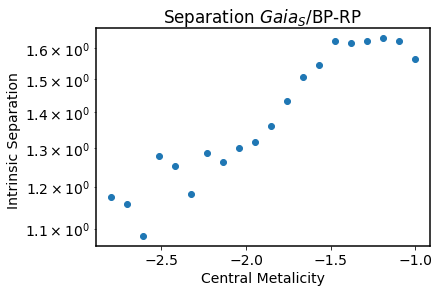

In [44]:

plt.scatter(zPoints,bprpEms,label="BPRP")
plt.errorbar(zPoints,bprpEms,bprpstds,ls="")
plt.title("Separation Metalicity dependence")
plt.xlabel("Central Metalicity")
plt.ylabel("Intrinsic Separation ")

plt.yscale("log")

plt.scatter(zPoints,Ems,label="Gs")
plt.errorbar(zPoints,Ems,stds,ls="")
plt.legend()
plt.show()


Ems = np.array(Ems)
bprpEms=np.array(bprpEms)

plt.scatter(zPoints,Ems/bprpEms)
plt.title(r"Separation $Gaia_S$/BP-RP")
plt.xlabel("Central Metalicity")
plt.ylabel("Intrinsic Separation ")

plt.yscale('log')

plt.show()